# 1. Problem Statement:Based upon the attributes , predict the amount of taxiride
2.Analytic approach->Regression(dependent variable->amount)


In [1]:
##Import the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression # linear regression is used because the dependent variable is numerical
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("TaxiFare.csv")

In [3]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


# Data exploration

In [4]:
df.shape

(50000, 8)

## There are 50000 observations and 8 columns
Out of 8 columns,one column is dependent variable and remaining 7 are independent variable
amount(dependent variable)->y

In [5]:
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

# checking for the missing values

In [6]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [7]:
#since there are no missing value present therefore we do not need to replcae them with mean ,median or mode.

<Axes: xlabel='amount', ylabel='count'>

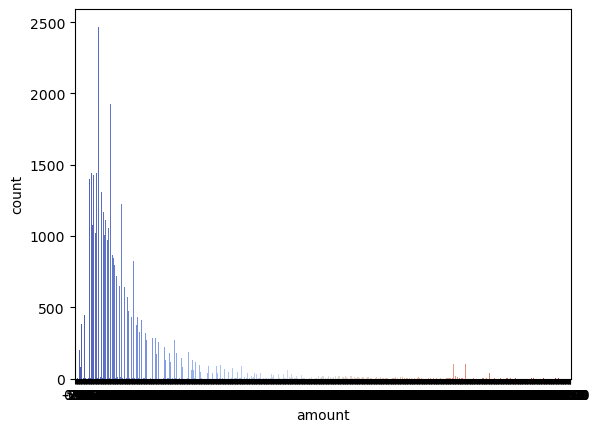

In [8]:
sns.countplot(x="amount",data=df,palette="coolwarm")

In [9]:
df["amount"].value_counts()

6.50     2468
4.50     2104
8.50     1929
6.10     1441
5.30     1440
         ... 
26.60       1
25.39       1
55.83       1
30.04       1
27.05       1
Name: amount, Length: 703, dtype: int64

<Axes: xlabel='amount', ylabel='count'>

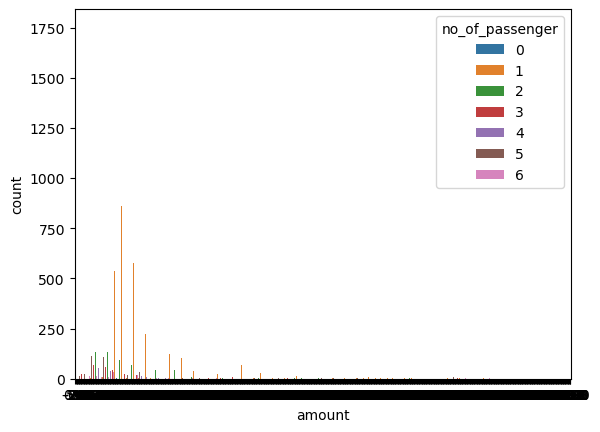

In [10]:
sns.countplot(x="amount",hue="no_of_passenger",data=df)

In [11]:
pd.crosstab(df["amount"],df["no_of_passenger"])

no_of_passenger,0,1,2,3,4,5,6
amount,,,,,,,
-5.0,0,1,0,0,0,0,0
-3.0,0,0,0,0,1,0,0
-2.9,0,1,0,0,0,0,0
-2.5,0,3,0,0,0,0,0
0.0,0,3,0,0,0,0,0
...,...,...,...,...,...,...,...
149.0,0,0,0,0,1,0,0
160.0,0,1,0,0,0,0,0
165.0,0,2,0,0,0,0,0


# Checking if outliers are thereor not


In [12]:
#if outliers are there then removing them using IQR

<Axes: >

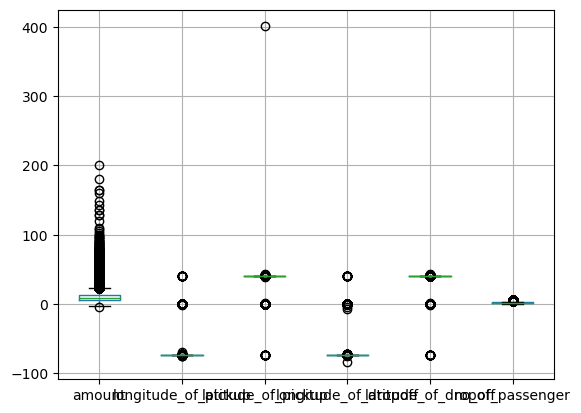

In [13]:
df.boxplot()

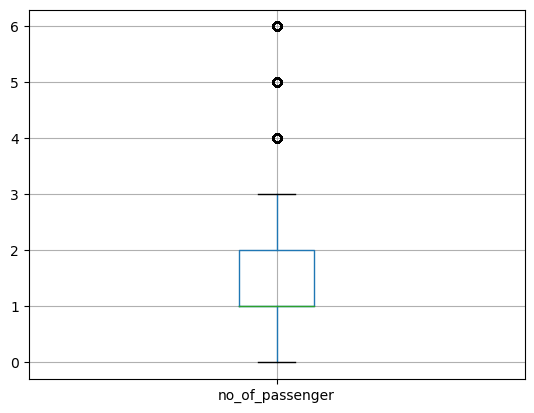

In [14]:
df.boxplot(column="no_of_passenger")
plt.show()

In [15]:
#def remove_outlier(col):
#create a user defined function called remove_outlier:
def remove_outlier(col):
    sorted(col)
    q1,q3=col.quantile([0.25,0.75])
    IQR=q3-q1
    lwr_bound=q1-(1.5*IQR)
    upr_bound=q3+(1.5*IQR)
    return lwr_bound,upr_bound

In [16]:
low,high=remove_outlier(df["no_of_passenger"])

In [17]:
df["no_of_passenger"]=np.where(df["no_of_passenger"]>high,high,df["no_of_passenger"])

In [18]:
df["no_of_passenger"]=np.where(df["no_of_passenger"]<low,low,df["no_of_passenger"])

<Axes: >

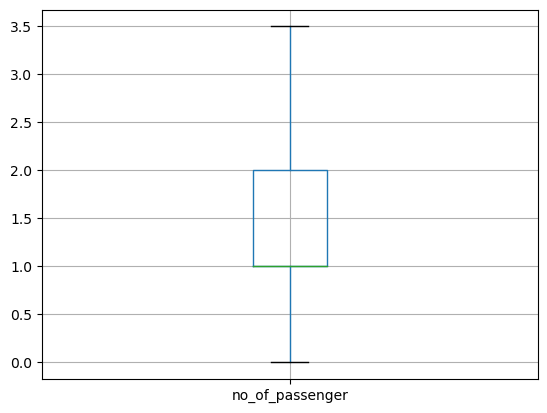

In [19]:
df.boxplot(column="no_of_passenger")

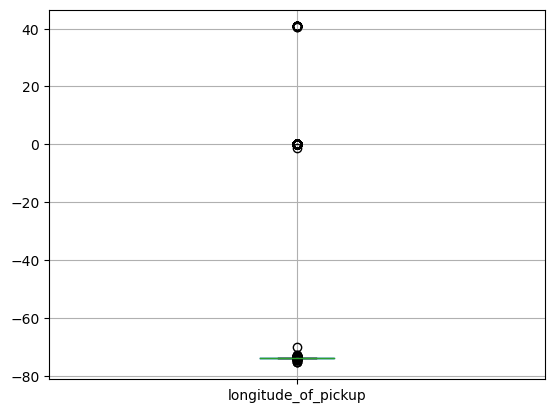

In [20]:
df.boxplot(column="longitude_of_pickup")
plt.show()

In [21]:
#def remove_outlier(col):
#create a user defined function called remove_outlier:
def remove_outlier(col):
    sorted(col)
    q1,q3=col.quantile([0.25,0.75])
    IQR=q3-q1
    lwr_bound=q1-(1.5*IQR)
    upr_bound=q3+(1.5*IQR)
    return lwr_bound,upr_bound

In [22]:
low,high=remove_outlier(df["longitude_of_pickup"])

In [23]:
df["longitude_of_pickup"]=np.where(df["longitude_of_pickup"]>high,high,df["longitude_of_pickup"])

In [24]:
df["longitude_of_pickup"]=np.where(df["longitude_of_pickup"]<low,low,df["longitude_of_pickup"])

<Axes: >

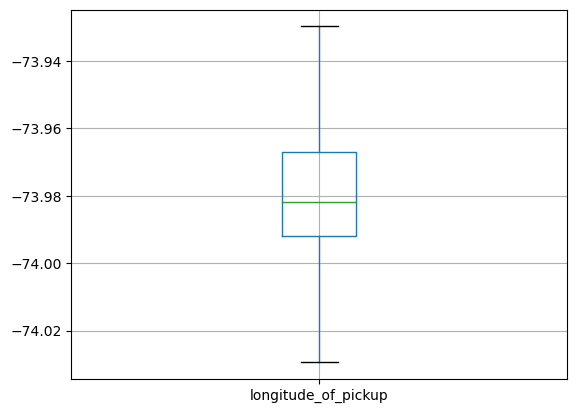

In [25]:
df.boxplot(column="longitude_of_pickup")

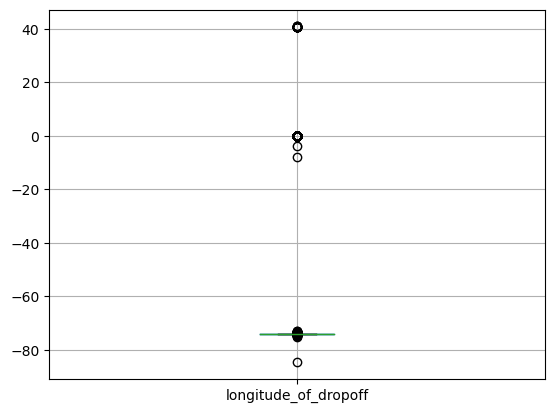

In [26]:
df.boxplot(column="longitude_of_dropoff")
plt.show()

In [27]:
#def remove_outlier(col):
#create a user defined function called remove_outlier:
def remove_outlier(col):
    sorted(col)
    q1,q3=col.quantile([0.25,0.75])
    IQR=q3-q1
    lwr_bound=q1-(1.5*IQR)
    upr_bound=q3+(1.5*IQR)
    return lwr_bound,upr_bound

In [28]:
low,high=remove_outlier(df["longitude_of_dropoff"])

In [29]:
df["longitude_of_dropoff"]=np.where(df["longitude_of_dropoff"]>high,high,df["longitude_of_dropoff"])

In [30]:
df["longitude_of_dropoff"]=np.where(df["longitude_of_dropoff"]<low,low,df["longitude_of_dropoff"])

<Axes: >

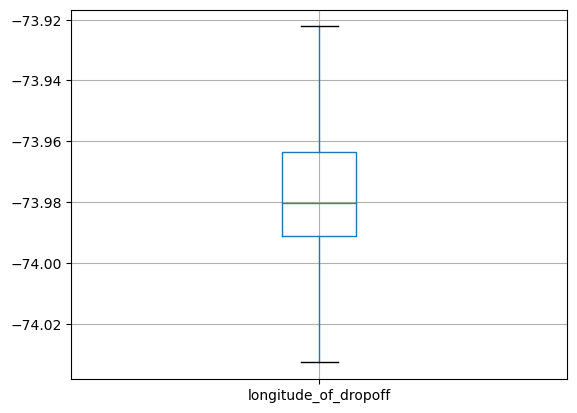

In [31]:
df.boxplot(column="longitude_of_dropoff")

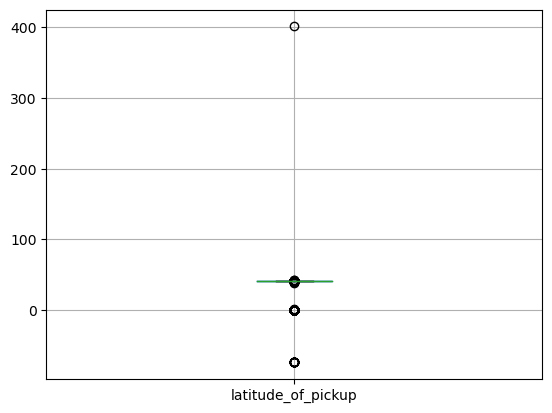

In [32]:
df.boxplot(column="latitude_of_pickup")
plt.show()

In [33]:
#def remove_outlier(col):
#create a user defined function called remove_outlier:
def remove_outlier(col):
    sorted(col)
    q1,q3=col.quantile([0.25,0.75])
    IQR=q3-q1
    lwr_bound=q1-(1.5*IQR)
    upr_bound=q3+(1.5*IQR)
    return lwr_bound,upr_bound
    

In [34]:
low,high=remove_outlier(df["latitude_of_pickup"])

In [35]:
df["latitude_of_pickup"]=np.where(df["latitude_of_pickup"]>high,high,df["latitude_of_pickup"])

In [36]:
df["latitude_of_pickup"]=np.where(df["latitude_of_pickup"]<low,low,df["latitude_of_pickup"])

<Axes: >

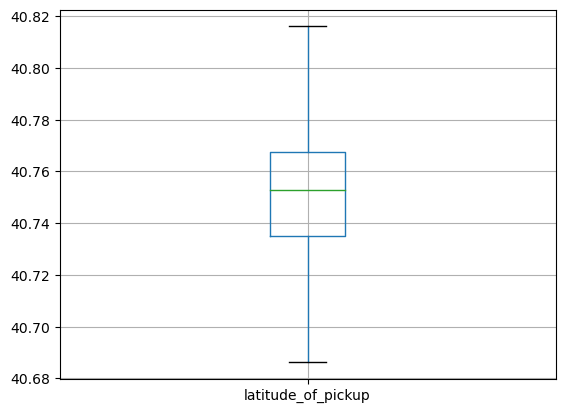

In [37]:
df.boxplot(column="latitude_of_pickup")

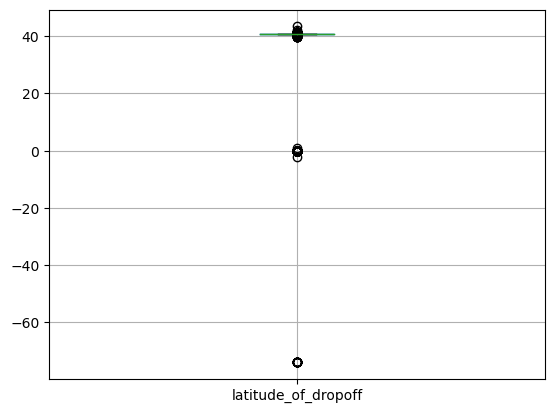

In [38]:
df.boxplot(column="latitude_of_dropoff")
plt.show()

In [39]:
#def remove_outlier(col):
#create a user defined function called remove_outlier:
def remove_outlier(col):
    sorted(col)
    q1,q3=col.quantile([0.25,0.75])
    IQR=q3-q1
    lwr_bound=q1-(1.5*IQR)
    upr_bound=q3+(1.5*IQR)
    return lwr_bound,upr_bound

In [40]:
low,high=remove_outlier(df["latitude_of_dropoff"])

In [41]:
df["latitude_of_dropoff"]=np.where(df["latitude_of_dropoff"]>high,high,df["latitude_of_dropoff"])

In [42]:
df["latitude_of_dropoff"]=np.where(df["latitude_of_dropoff"]<low,low,df["latitude_of_dropoff"])

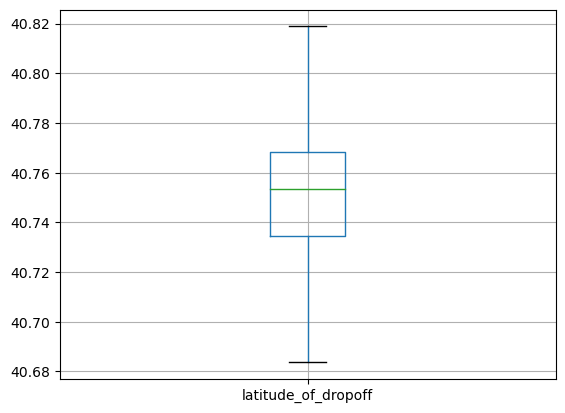

In [43]:
df.boxplot(column="latitude_of_dropoff")
plt.show()

In [44]:
df=df.drop(["date_time_of_pickup","unique_id"],axis=1)

In [45]:
#lets build our linear model
#independent variables
X=df.drop(["amount"],axis=1)
#dependent variable
y=df[["amount"]]

In [46]:
#split X and y into training and test set 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)

# Fitting the linear model

In [47]:
model=LinearRegression()

In [48]:
model.fit(X_train,y_train)

LinearRegression()

In [49]:
model.score(X_train,y_train)#diff between test and train score is less than 5% therefore it is a good model

0.105317347043273

In [50]:
model.score(X_test,y_test)

0.12206117840067143

In [51]:
df.dtypes

amount                  float64
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger         float64
dtype: object

# Using different types of regression models

# Decision tree regressor

In [52]:
from sklearn.tree import DecisionTreeRegressor

In [53]:
m3=DecisionTreeRegressor(max_depth=3)
# using hyper parameters such as max_depth to improve the score because it was a overfitting model.

In [54]:
m3.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [55]:
m3.score(X_train,y_train)# diff between train and test score is 1% therefore it is a good model

0.49565004261658696

In [56]:
m3.score(X_test,y_test)

0.5075590644967442

# AdaBoost Regressor

In [57]:
from sklearn.ensemble import AdaBoostRegressor

In [58]:
m4=AdaBoostRegressor( n_estimators=5)
#using n_estimators to improve the score because diff between train and test  score  more than 5% and was a overfitting model.

In [59]:
m4.fit(X_train,y_train)

AdaBoostRegressor(n_estimators=5)

In [60]:
m4.score(X_train,y_train)
# it is good model because the diff between train and test score is less than 5 %

0.42667723241803446

In [61]:
m4.score(X_test,y_test)

0.43157217425619143

# GradientBoosting Regressor

In [62]:
from sklearn.ensemble import GradientBoostingRegressor

In [63]:
m5=GradientBoostingRegressor()

In [64]:
m5.fit(X_train,y_train)

GradientBoostingRegressor()

In [65]:
m5.score(X_train,y_train)
# it is good model because the diff between train and test score is less than 5 %

0.6848741312554716

In [66]:
m5.score(X_test,y_test)

0.6923923815469022

# RandomForest Regressor

In [67]:
from sklearn.ensemble import RandomForestRegressor

In [68]:
m6=RandomForestRegressor(max_depth=3)
# using max depth to improve score because the diff between train and test score was more than 5% and was a overfitting model.

In [69]:
m6.fit(X_train,y_train)

RandomForestRegressor(max_depth=3)

In [70]:
m6.score(X_train,y_train)

0.5018076245133626

In [71]:
m6.score(X_test,y_test)

0.5119736456251835